In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline
import json
import os
import statsmodels.api as sm
from scipy import stats


Populating the interactive namespace from numpy and matplotlib


In [2]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"


In [3]:
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)


In [4]:
type(allmales)


dict

In [5]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [6]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(allfemales['all'])

In [7]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)


/Users/svarmit/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/svarmit/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)
also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

In [9]:
allfemales['all'].head(n=3)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032


(0, 50000)

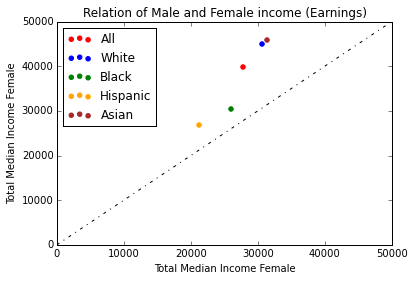

In [10]:
medIncomFeAll = allfemales['all']['Median income'][2]
medIncomFeWhite = allfemales['white']['Median income'][2]
medIncomFeBlack = allfemales['black']['Median income'][2]
medIncomFeHispanic = allfemales['hispanic']['Median income'][2]
medIncomFeAsian = allfemales['asian']['Median income'][2]
medIncomMaAll = allmales['all']['Median income'][2]
medIncomMaWhite = allmales['white']['Median income'][2]
medIncomMaBlack = allmales['black']['Median income'][2]
medIncomMaHispanic = allmales['hispanic']['Median income'][2]
medIncomMaAsian = allmales['asian']['Median income'][2]

#Scatter plot to compare all the median incomes (one category) in same plot
plt.Figure(figsize=(15,10))
plt.scatter(medIncomFeAll,medIncomMaAll,color ='r',label='All')
plt.scatter(medIncomFeWhite,medIncomMaWhite,color ='b',label='White')
plt.scatter(medIncomFeBlack,medIncomMaBlack,color ='g',label='Black')
plt.scatter(medIncomFeHispanic,medIncomMaHispanic,color ='orange',label='Hispanic')
plt.scatter(medIncomFeAsian,medIncomMaAsian,color ='brown',label='Asian')
plt.title('Relation of Male and Female income (Earnings)')
plt.xlabel('Total Median Income Female')
plt.ylabel('Total Median Income Female')
plt.legend(loc=2)
plt.plot((0,50000), (0,50000), linestyle='-.',color = 'black')
plt.ylim(0,50000)
plt.xlim(0,50000)

###Caption:
The total median of female for the earnings for all the race is greater than that of male

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
#Creating the data for leniar regression model(OLS)
#Dependent variable
y = [medIncomMaAll, medIncomMaWhite, medIncomMaBlack, medIncomMaHispanic, medIncomMaAsian]
#Independent variable
x = [medIncomFeAll, medIncomFeWhite, medIncomFeBlack, medIncomFeHispanic, medIncomFeAsian]
X = sm.add_constant(x, prepend = False)
model = sm.OLS(y,X).fit()
print model.summary()
print y
print X

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     32.31
Date:                Sun, 18 Oct 2015   Prob (F-statistic):             0.0108
Time:                        19:20:08   Log-Likelihood:                -45.654
No. Observations:                   5   AIC:                             95.31
Df Residuals:                       3   BIC:                             94.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.0191      0.355      5.684      0.0

/Users/svarmit/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [12]:
#Getting the parameters and printing for analysis
b1, b0 = model.params
x_val = np.arange(0,60000,1)
print 'b1= ',b1
print 'b0= ',b0
y_val = b1*x_val + b0

b1=  2.01908600904
b0=  -17702.7925082


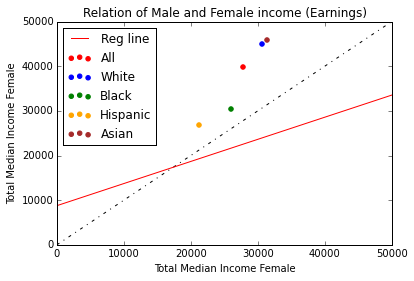

In [13]:
#To print the regression line
plt.Figure(figsize=(20,20))
plt.scatter(medIncomFeAll,medIncomMaAll,color ='r',label='All')
plt.scatter(medIncomFeWhite,medIncomMaWhite,color ='b',label='White')
plt.scatter(medIncomFeBlack,medIncomMaBlack,color ='g',label='Black')
plt.scatter(medIncomFeHispanic,medIncomMaHispanic,color ='orange',label='Hispanic')
plt.scatter(medIncomFeAsian,medIncomMaAsian,color ='brown',label='Asian')
plt.title('Relation of Male and Female income (Earnings)')
plt.xlabel('Total Median Income Female')
plt.ylabel('Total Median Income Female')
plt.plot((0,50000), (0,50000), linestyle='-.',color = 'black')
plt.ylim(0,50000)
plt.xlim(0,50000)
plt.plot(y_val,x_val,color ='r',label='Reg line')
plt.legend(loc=2)
#print (x)

In [14]:
cor = stats.spearmanr(y, x)
np.std(y)/np.std(x)
beta1=cor[0]*np.std(x)/np.std(y)
beta0=np.mean(y)-beta1*np.mean(x)

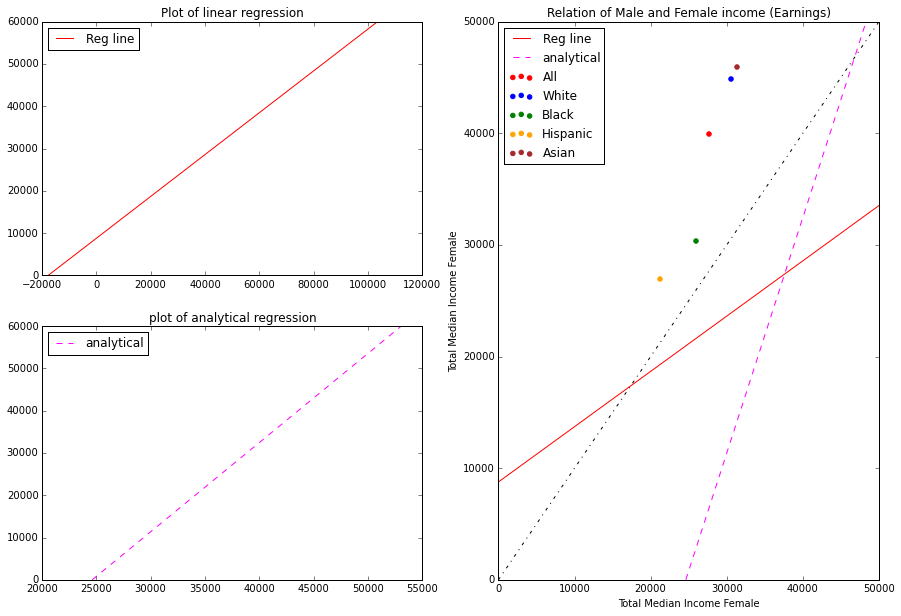

In [15]:
#To print the Analytical line and compare with the OLS
y_ana_val=beta0+beta1*x_val
plt.figure(figsize=(15,10))
plt.subplot(122)
plt.scatter(medIncomFeAll,medIncomMaAll,color ='r',label='All')
plt.scatter(medIncomFeWhite,medIncomMaWhite,color ='b',label='White')
plt.scatter(medIncomFeBlack,medIncomMaBlack,color ='g',label='Black')
plt.scatter(medIncomFeHispanic,medIncomMaHispanic,color ='orange',label='Hispanic')
plt.scatter(medIncomFeAsian,medIncomMaAsian,color ='brown',label='Asian')
plt.title('Relation of Male and Female income (Earnings)')
plt.xlabel('Total Median Income Female')
plt.ylabel('Total Median Income Female')
plt.plot((0,50000), (0,50000), linestyle='-.',color = 'black')
plt.plot(y_val,x_val,color ='r',label='Reg line')
plt.legend(loc=2)
plt.plot(y_ana_val,x_val,color='magenta',linestyle='--',label='analytical')
plt.legend(loc=2)
plt.ylim(0,50000)
plt.xlim(0,50000)
plt.figure(1)
plt.subplot(221)
plt.plot(y_val,x_val,color ='r',label='Reg line')
plt.title('Plot of linear regression')
plt.legend(loc=2)
plt.subplot(223)
plt.title('plot of analytical regression')
plt.plot(y_ana_val,x_val,color='magenta',linestyle='--',label='analytical')
plt.legend(loc=2)



In [16]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [17]:
X_all = sm.add_constant(all_females[~all_females.mask], prepend = False)
Y_all = all_males[~all_males.mask]
model_all = sm.OLS(Y_all, X_all).fit()
print model_all.summary()
b_all1, b_all0 = model_all.params
print 'b_all_0 ',b_all0
print 'b_all_1 ',b_all1
x_new_val = np.arange(0,60000,1)
y_new_val = b_all1*x_new_val + b_all0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        19:20:09   Log-Likelihood:                -1743.6
No. Observations:                 178   AIC:                             3491.
Df Residuals:                     176   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4110      0.043     32.787      0.0

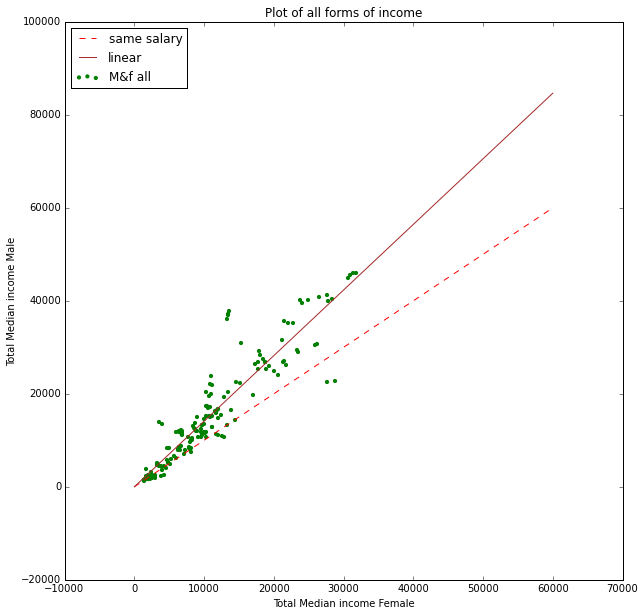

In [18]:
plt.figure(3)
plt.figure(figsize=(10,10))
plt.xlim = ((0,60000))
plt.ylim = ((0,60000))
plt.scatter(all_females,all_males,s=10 ,color='g',label='M&f all')
plt.plot((0,60000), (0,60000), color='r',linestyle='--', label='same salary')
plt.plot(x_new_val,y_new_val,color='brown',label ='linear')
plt.title('Plot of all forms of income' )
plt.xlabel('Total Median income Female')
plt.ylabel('Total Median income Male')
plt.legend(loc=2)

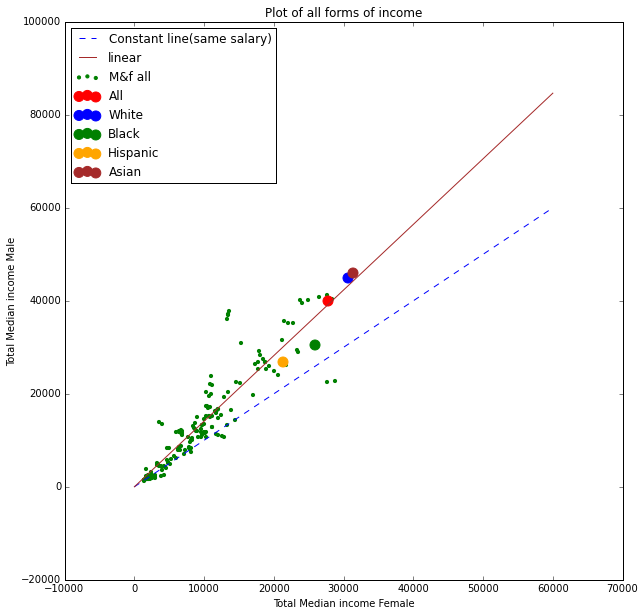

In [19]:
plt.figure(3)
plt.figure(figsize=(10,10))
plt.scatter(all_females,all_males,s=10 ,color='g',label='M&f all')
plt.plot((0,60000), (0,60000), color='b',linestyle='--', label='Constant line(same salary)')
plt.ylim = ((0,60000))
plt.xlim = ((0,60000))
plt.plot(x_new_val,y_new_val,color='brown',label ='linear')
plt.title('Plot of all forms of income' )
plt.xlabel('Total Median income Female')
plt.ylabel('Total Median income Male')
plt.scatter(medIncomFeAll,medIncomMaAll,s=100,color ='r',label='All')
plt.scatter(medIncomFeWhite,medIncomMaWhite,s=100,color ='b',label='White')
plt.scatter(medIncomFeBlack,medIncomMaBlack,s=100,color ='g',label='Black')
plt.scatter(medIncomFeHispanic,medIncomMaHispanic,s=100,color ='orange',label='Hispanic')
plt.scatter(medIncomFeAsian,medIncomMaAsian,s=100,color ='brown',label='Asian')
plt.legend(loc=2)


###Now pick a stipend, maybe your ideal stipend?
###and predict what a woman in a position where a man recieves your ideal stipend would make
###lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

######There is price variation in the median income between male and female. Male get more salary as compared to female.
######There is difference in the salary for the race also.
######    1) The median income of Asian male is maximum where as Hispanic male has least median income.
######    2) The scenario of median income of the female as per race is simmilar.